<img src="https://www.cems.uwe.ac.uk/~pa-legg/uwecyber/images/uwe.png" width=300>
<img src="https://www.cems.uwe.ac.uk/~pa-legg/uwecyber/images/uwecyber_acecse_200.jpg" width=300>

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Task 3: Insider Threat Detection (2021)
---

The completion of this worksheet is worth **40%** towards your portfolio for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Task
---

In this task, you have been asked to investigate a potential security threat within an organisation. Building on your previous worksheet expertise, you will need to apply your skills and knowledge of data analytics and visualisation to examine and explore the datasets methodically to uncover which employee is acting as a threat and why. The company have provided you with activity logs for various user interactions for the past 6 months, resulting in a lot of data that they need your expertise for to decipher. They want to have a report that details the investigation that you have carried out, details of the suspected individual, and a clear rationale as to why this suspect is flagged. You will need to document your investigation, giving clear justification for your process using Markdown annotation within your notebook. You will need to provide a clear rationale for why you suspect a given individual to be acting as a threat, based on the pattern of activity that you identify.

<i>This coursework is specifically designed to challenge your critical thinking and creativity, and is designed as an open problem. Examine the data and try to think how an individual user may appear as an anomaly against the remainder of the data. This could be an anomaly compared to a group of users, or an anomaly as compared over time.</i>


### Assessment and Marking
---

| Criteria | 0-39 | 40-49 | 50-59 | 60-69 | 70-84 | 85-100 |
| --- | --- | --- | --- | --- | --- | --- |
| **Identification of the suspicious activity (30%)** | No evidence of progress | A limited attempt to address this criteria | A working solution but perhaps not optimal | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |
| **Analytical process and reasoning (30%)**  | No evidence of progress | A limited attempt to address this criteria |  A working solution but perhaps not optimal | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |
| **Visualisation techniques (20%)**  | No evidence of progress | A limited attempt to address this criteria |  A working solution but perhaps not optimal | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |
| **Clarity and professional presentation (20%)**  | No evidence of progress | A limited attempt to address this criteria | Some evidence of markdown commentary | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |

To achieve the higher end of the grade scale, you need to demonstrate creativity in how you approach the problem of identifying malicious behaviours, and ensure that you have accounted for multiple anomalies across the set of data available.

You will need to implement your final solution in the Notebook format, with Markdown annotation -  you should use this notebook file as a template for your submission. You are also expected to complete the assignment self-assessment.

Your submission should include:
- HTML export of your complete assignment in notebook format.
- Original ipynb source file of your notebook.

### Self-Assessment
---

For each criteria, please reflect on the marking rubric and indicate what grade you would expect to receive for the work that you are submitting. For your own personal development and learning, it is important to reflect on your work and to attempt to assess this careful. Do think carefully about both positive aspects of your work, as well as any limitations you may have faced.

- **Identification of the suspicious activity (30%)**: You estimate that your grade will be 100.

- **Analytical process and reasoning (30%)**: You estimate that your grade will be 100.

- **Visualisation techniques (20%)**: You estimate that your grade will be 100.

- **Clarity and professional presentation (20%)**: You estimate that your grade will be 100.

Please provide a minimum of two sentences to comment and reflect on your own self-assessment:

*I feel as though I have done very well on this assignment, and I have used a multitude of different methods and approaches to finding and exploring the data sets as to find any important information about what took place. This allowed me to find the user which I am quite confident is the insider threat, which I came to the conclusion of via many visualisations such as different types of bar charts, line charts, scatterplots, and an interactive visualisation.*

*I think my analytical process and reasoning was also good as it was the driving force behind my analysis, and I thought a lot about what an insider might do, such as what attacks they might perform, and what they might do to try to hide their tracks. For example, considering the context that the suspected insider is a director, I thought it would be likely they could have tampered with the data to hide their tracks with their executive powers.*

*I made a big effort to keep my report tidy and to use markdown to explain what I was doing, and this proved to be difficult given the exploratory nature of this task. I think despite that though I have made each step as clear as I could have, and I have explained my reasoning and thought process all the way through.*

## Load in the data

Please provide the string below that you have been assigned as given in the spreadsheet available on Blackboard. Please also ensure you have saved your dataset folder in the following directory relative to your notebook: **"./T3_data/"**

In [6]:
# POSSIBLE DATASETS FOR 2021-22 MODULE RUN
dataset_list = ['lockdown-lockups', 'onlinebargains', 'trackntrace', 'zoooom']

# PLEASE ENTER THE NAME OF THE DATASET ASSIGNED TO YOU AS INDICATED ON BLACKBOARD
DATASET = 'lockdown-lockups'

### Function for loading data - do not change

In [7]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime

def load_data(DATASET):
    if DATASET in dataset_list:
        email_data = pd.read_csv('./T3_data/' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
        file_data = pd.read_csv('./T3_data/' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
        web_data = pd.read_csv('./T3_data/' + DATASET + '/web_data.csv', parse_dates=True, index_col=0)
        login_data = pd.read_csv('./T3_data/' + DATASET + '/login_data.csv', parse_dates=True, index_col=0)
        usb_data = pd.read_csv('./T3_data/' + DATASET + '/usb_data.csv', parse_dates=True, index_col=0)
        employee_data = pd.read_csv('./T3_data/' + DATASET + '/employee_data.csv', index_col=0)
        
        email_data['datetime'] = pd.to_datetime(email_data['datetime'])
        file_data['datetime'] = pd.to_datetime(file_data['datetime'])
        web_data['datetime'] = pd.to_datetime(web_data['datetime'])
        login_data['datetime'] = pd.to_datetime(login_data['datetime'])
        usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])
    else:
        print ("DATASET variable not defined - please refer to Blackboard for DATASET name")
        return
    return employee_data, login_data, usb_data, web_data, file_data, email_data

employee_data, login_data, usb_data, web_data, file_data, email_data = load_data(DATASET)
employee_data

,user,role,email,pc
0,usr-uda,Security,usr-uda@lockdown-lockups.com,pc0
1,usr-hhe,Security,usr-hhe@lockdown-lockups.com,pc1
2,usr-vxr,Finance,usr-vxr@lockdown-lockups.com,pc2
3,usr-nba,Finance,usr-nba@lockdown-lockups.com,pc3
4,usr-hqt,Finance,usr-hqt@lockdown-lockups.com,pc4
...,...,...,...,...
244,usr-jwo,Finance,usr-jwo@lockdown-lockups.com,pc244
245,usr-hiz,Security,usr-hiz@lockdown-lockups.com,pc245
246,usr-svz,Services,usr-svz@lockdown-lockups.com,pc246
247,usr-ndr,HR,usr-ndr@lockdown-lockups.com,pc247


## Start your Investigation

In [8]:
### The following code samples may be useful to aid your investigation

In [9]:
### Create a hirarchy dictionary that specifies, all users within each role / all user e-mails within each role
user_set = {}
user_set_emails = {}
all_roles = employee_data['role'].unique()
for role in all_roles:
    user_set[role] = list(employee_data[employee_data['role'] == role]['user'].values)
    user_set_emails[role] = list(employee_data[employee_data['role'] == role]['email'].values)
user_set_emails

{'Security': ['usr-uda@lockdown-lockups.com',
  'usr-hhe@lockdown-lockups.com',
  'usr-zay@lockdown-lockups.com',
  'usr-mdl@lockdown-lockups.com',
  'usr-yjc@lockdown-lockups.com',
  'usr-hvk@lockdown-lockups.com',
  'usr-ybh@lockdown-lockups.com',
  'usr-ryi@lockdown-lockups.com',
  'usr-duj@lockdown-lockups.com',
  'usr-scc@lockdown-lockups.com',
  'usr-cyr@lockdown-lockups.com',
  'usr-ngr@lockdown-lockups.com',
  'usr-hzp@lockdown-lockups.com',
  'usr-rnt@lockdown-lockups.com',
  'usr-hfz@lockdown-lockups.com',
  'usr-naf@lockdown-lockups.com',
  'usr-kzn@lockdown-lockups.com',
  'usr-olj@lockdown-lockups.com',
  'usr-jmr@lockdown-lockups.com',
  'usr-pzz@lockdown-lockups.com',
  'usr-hpt@lockdown-lockups.com',
  'usr-hui@lockdown-lockups.com',
  'usr-nbg@lockdown-lockups.com',
  'usr-alj@lockdown-lockups.com',
  'usr-nrx@lockdown-lockups.com',
  'usr-kvv@lockdown-lockups.com',
  'usr-xwd@lockdown-lockups.com',
  'usr-wyj@lockdown-lockups.com',
  'usr-tzd@lockdown-lockups.com',
  

In [10]:
### Filter the data by all users that are in a given role
file_data[ file_data['user'].isin(user_set[role]) ]

,datetime,user,filename
1,2020-01-01 00:50:48.627385,usr-hyo,/do_not_delete
2,2020-01-01 01:01:38.409035,usr-hyo,/newsletter
3,2020-01-01 01:14:49.310254,usr-hyo,/tech
4,2020-01-01 01:17:22.914953,usr-hyo,/newsletter
6,2020-01-01 01:21:22.301228,usr-hyo,/do_not_delete
...,...,...,...
3799265,2020-11-30 23:40:54.695141,usr-lnn,/newsletter/general
3799266,2020-11-30 23:48:35.828385,usr-nic,/secret
3799267,2020-11-30 23:49:02.955959,usr-vul,/company_profile
3799268,2020-11-30 23:49:28.216624,usr-nic,/private/staffreview


In [11]:
### Get the day of the year for a given datetime column
email_data['datetime'].dt.dayofyear

0            1
1            1
2            1
3            1
4            1
          ... 
3795054    335
3795055    335
3795056    335
3795057    335
3795058    335
Name: datetime, Length: 3795059, dtype: int64

In [12]:
### Number of unique users in the dataset - this should be 249
len(employee_data['user'].unique())

249

The above code will load in the dataset, and it will reveal details about users based on the role that they are linked to. It will show you how you can filter the data based on those in a particular role, and it will show how you can obtain the day of the year that a data entry refers to.

Now it is over to you...

For better visualisation, the default HTML style for plots will be centered.

In [13]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Contextualisation
#### Before proceeding with the analysis, some details about the data will be looked at to provide context for the analysis.

There are 249 users, and we also have 6 datasets including:
- employee_data
- login_data
- usb_data
- web_data
- file_data
- email_data

Plotting each user into a pie chart, it can also be seen that they are in uneven distrobutions.

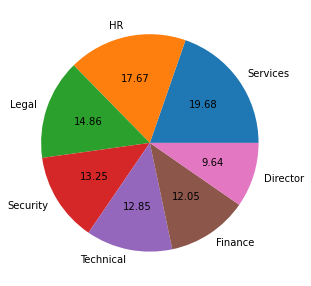

In [14]:
employee_data['role'].value_counts().plot(kind='pie',autopct='%.2f',ylabel='',figsize=(5,5))
plt.show();

This should be important to consider moving on, as it is likely to be misleading if groups are treated as though they have the same size during the analysis.

It should also be expected that users from different roles are likely to behave differently, for example those who work in Technical may access a large number of computers at varying times for maintenance, meanwhile such activity is likely to be suspicious if it came from someone from Security.

## Analysis
### Now that the context of the data sets is understood, detailed analysis can now begin.
To begin, let's look at the internet usage of different users over the timespan of the web_data dataset.

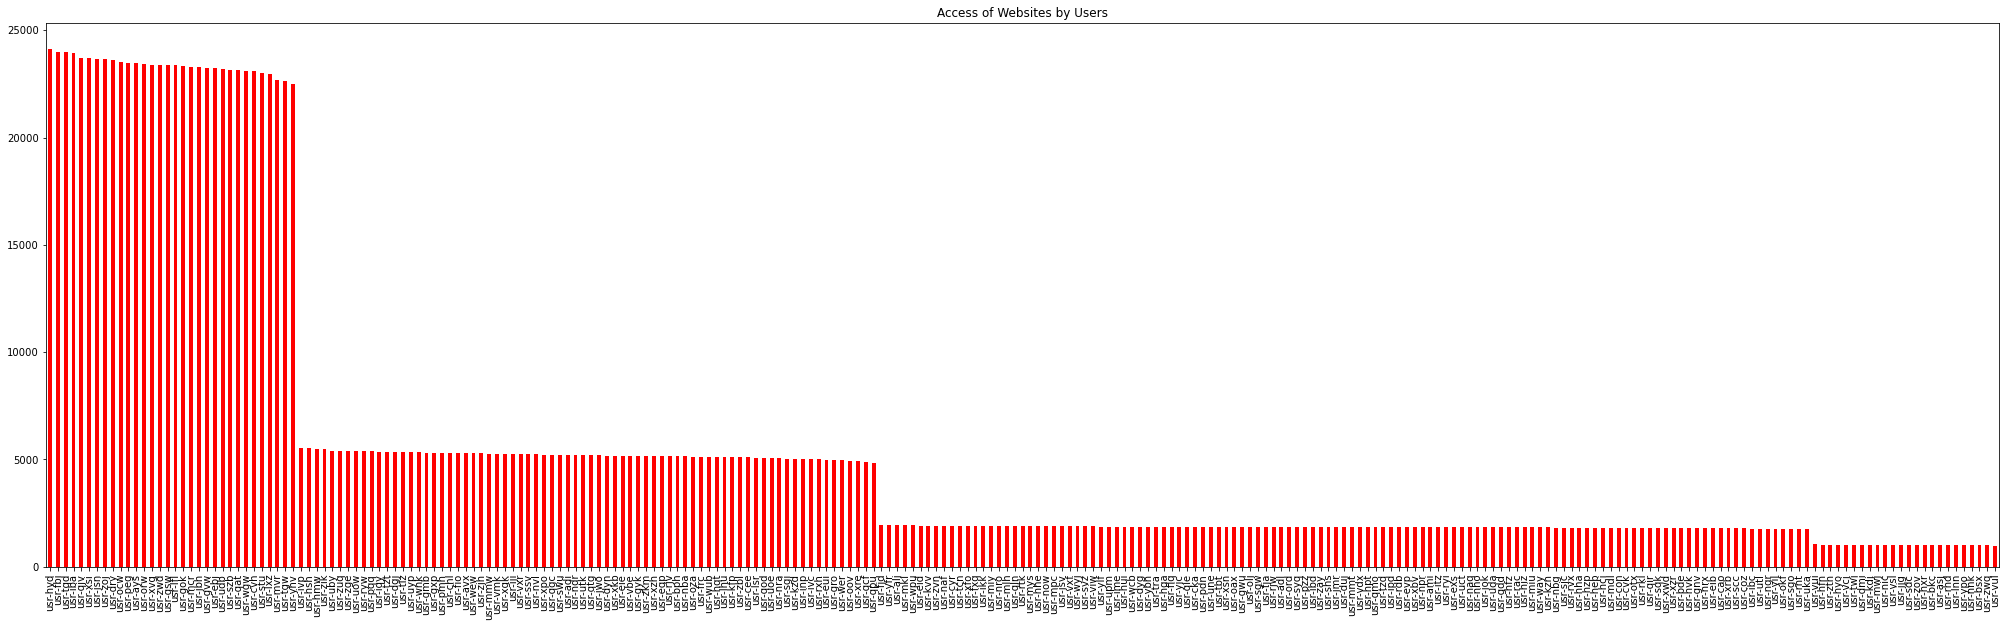

In [15]:
#Separate the dataset
barData = [web_data['user']]
headers = ['user']
barData = pd.concat(barData, axis=1, keys=headers)

#Split the users into different role datasets
#security = web_data.loc[web_data['user'].isin(user_set['Security'])]

#securityUsers = 

security = web_data.loc[web_data['user'].isin(user_set['Security'])]
hr = web_data.loc[web_data['user'].isin(user_set['HR'])]
technical = web_data.loc[web_data['user'].isin(user_set['Technical'])]
services = web_data.loc[web_data['user'].isin(user_set['Services'])]
legal = web_data.loc[web_data['user'].isin(user_set['Legal'])]
finance = web_data.loc[web_data['user'].isin(user_set['Finance'])]
director = web_data.loc[web_data['user'].isin(user_set['Director'])]

plt.ylabel = 'Weblinks Accessed'
plt.xlabel = 'User'

#Now plot
barData['user'].value_counts().plot(kind='bar', title='Access of Websites by Users', color='Red', figsize=(35, 10))

plt.xticks(rotation=90)
plt.show();


## Analysis
This is not too useful, as at a glance there are no immediately obvious outliers or a useful pattern. Although there is great variation between different users and internet links accessed, this is most likely a result of the expecedly different behavior between different rolls previously mentioned.

Secondly, because the chart is organised by number of links accessed, a clear outlier could be hidden amongst the group of users that typically use the web more. For example, someone in security might be using the web the same amount as those who work in technical and thus be hidden amongst them on the visualisation.

## The next step
To see whether this is the case, and to have a better look for outliers, users of each role will be plotted separately to see if there are any outliers that stand out amongst their peers in activity.

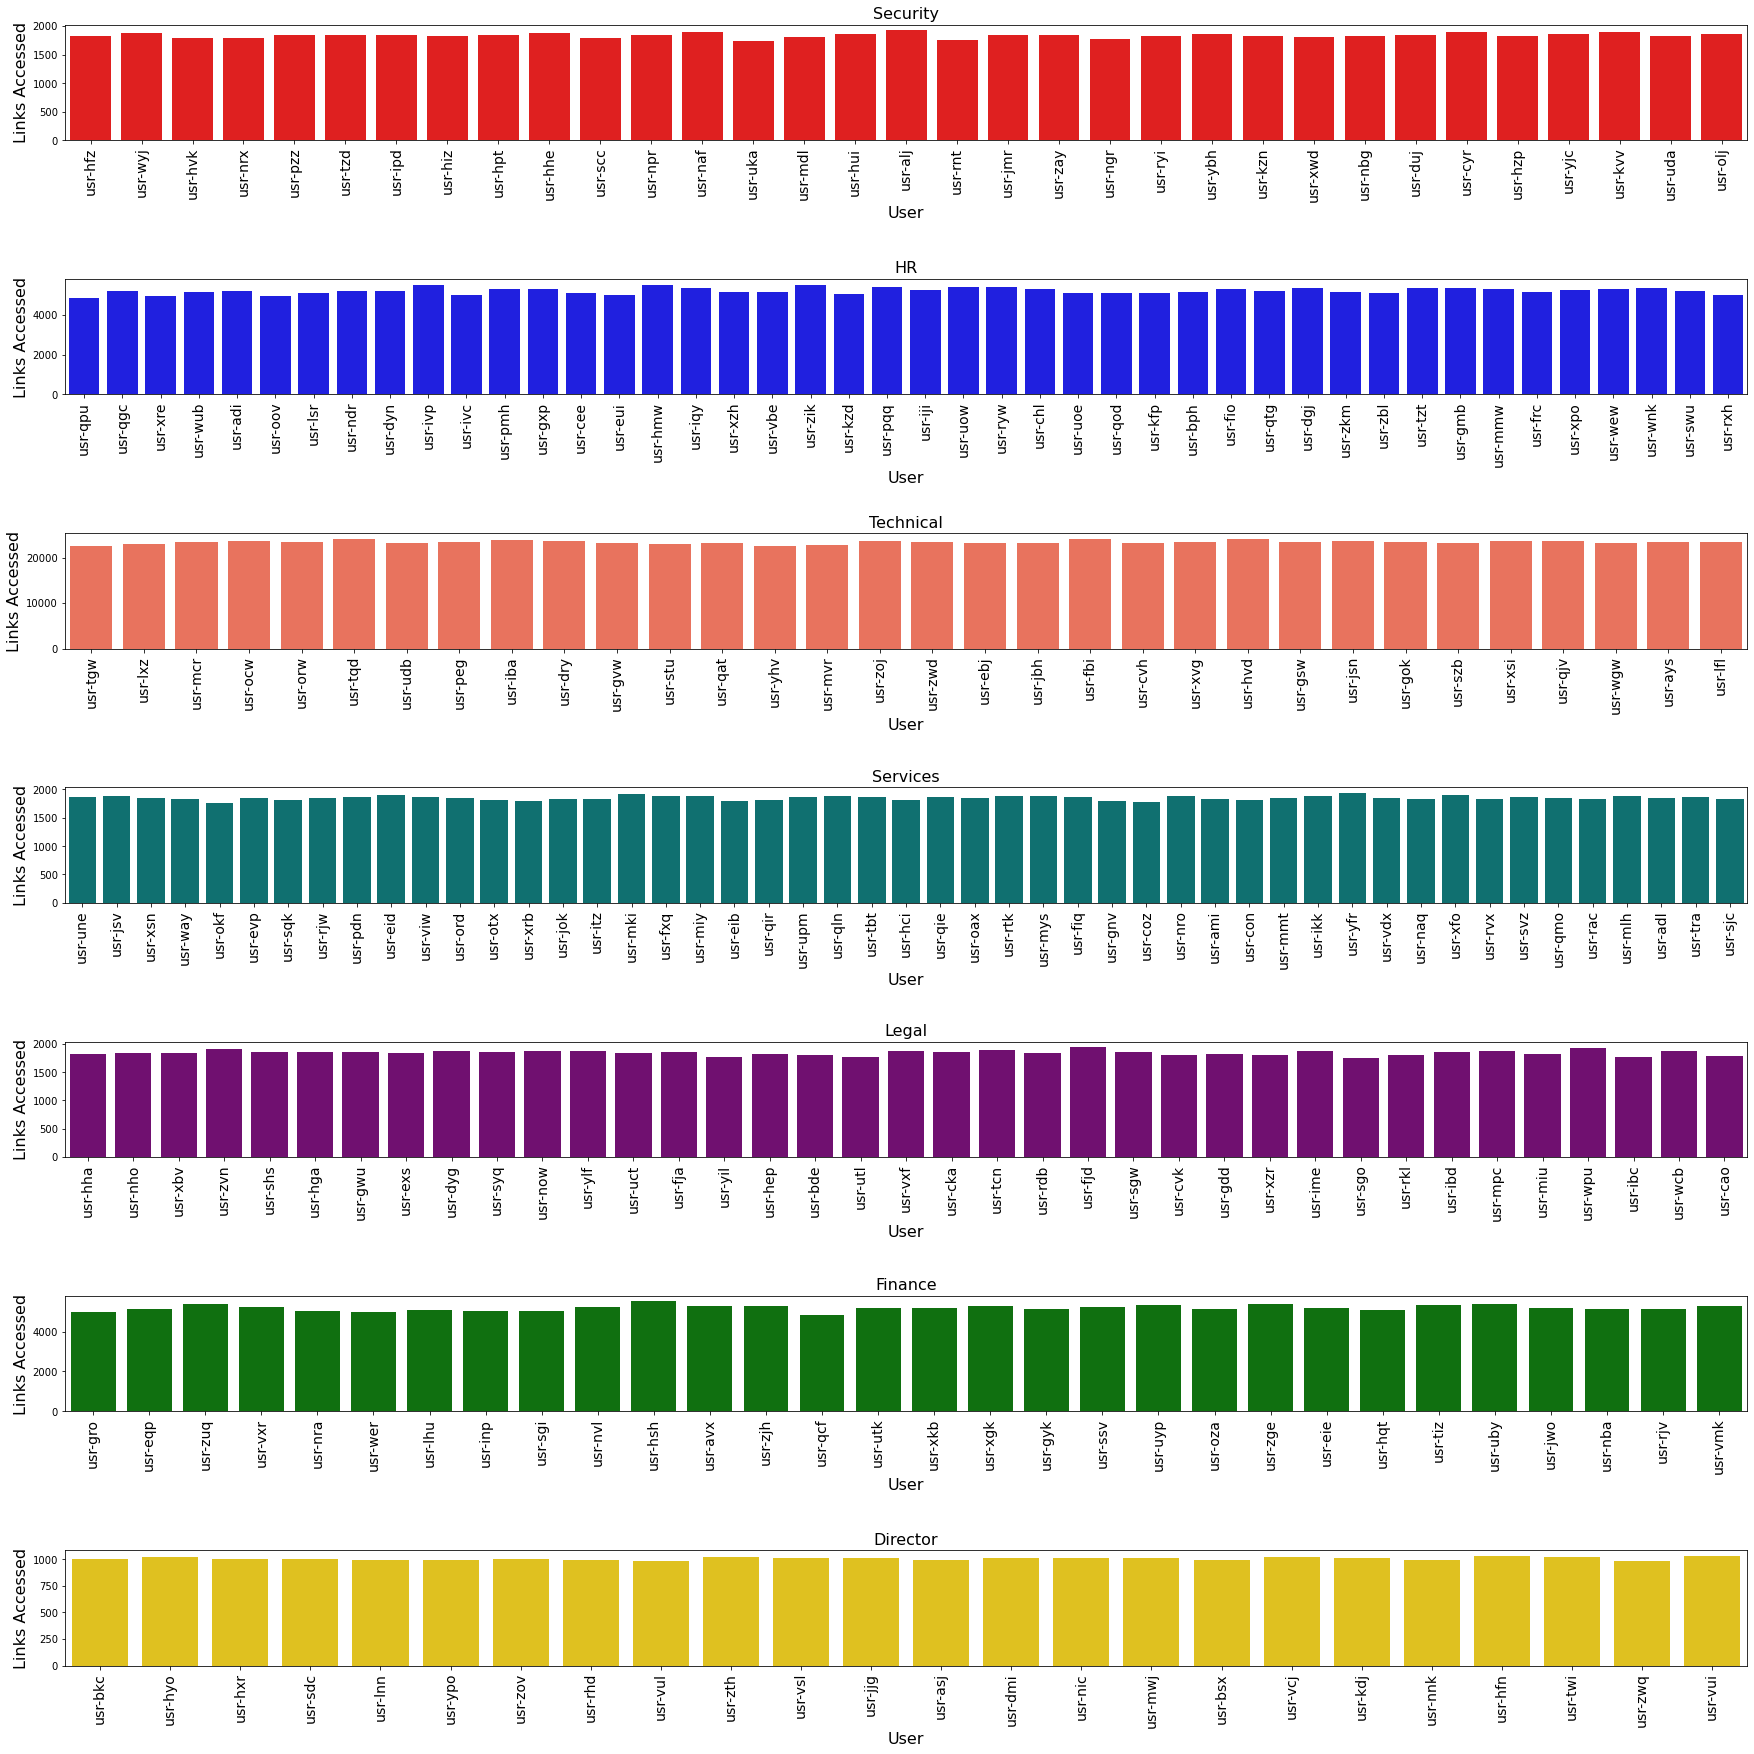

In [16]:
#There are 7 rolls, so a subplot should be made for each roll
fig, ax = plt.subplots(7, 1, figsize=(25,25))

#Now create new dataframes, one for each roll including all its users.
security = web_data.loc[web_data['user'].isin(user_set['Security'])]
security = security.assign(role='Security')
hr = web_data.loc[web_data['user'].isin(user_set['HR'])]
hr = hr.assign(role='HR')
technical = web_data.loc[web_data['user'].isin(user_set['Technical'])]
technical = technical.assign(role='Technical')
services = web_data.loc[web_data['user'].isin(user_set['Services'])]
services = services.assign(role='Services')
legal = web_data.loc[web_data['user'].isin(user_set['Legal'])]
legal = legal.assign(role='Legal')
finance = web_data.loc[web_data['user'].isin(user_set['Finance'])]
finance = finance.assign(role='Security')
director = web_data.loc[web_data['user'].isin(user_set['Director'])]
director = director.assign(role='Director')

#Now plot each dataframe, giving it a colour and specifying which subplot space it should occupy
seaborn.countplot(x='user', ax=ax[0], lw=0., data=security, color='Red')
seaborn.countplot(x='user', ax=ax[1], lw=0., data=hr, color='Blue')
seaborn.countplot(x='user', ax=ax[2], lw=0., data=technical, color='Tomato')
seaborn.countplot(x='user', ax=ax[3], lw=0., data=services, color='Teal')
seaborn.countplot(x='user', ax=ax[4], lw=0., data=legal, color='Purple')
seaborn.countplot(x='user', ax=ax[5], lw=0., data=finance, color='Green')
seaborn.countplot(x='user', ax=ax[6], lw=0., data=director, color='Gold')

#Set appropriate titles and font sizes for each subplot
ax[0].set_title("Security", fontsize=16)
ax[1].set_title("HR", fontsize=16)
ax[2].set_title("Technical", fontsize=16)
ax[3].set_title("Services", fontsize=16)
ax[4].set_title("Legal", fontsize=16)
ax[5].set_title("Finance", fontsize=16)
ax[6].set_title("Director", fontsize=16)

#Set fontsize, rotation and names for all x ticks and axis titles for all subplots
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90,fontsize = 14)
    ax.set_ylabel("Links Accessed",fontsize = 16)
    ax.set_xlabel("User",fontsize = 16)

#Specify layout type and padding size
fig.tight_layout(pad=3)

#And finally display
plt.show();

## Analysis
With the web usage of all users of different roles now better visualised, there are still no clear outliers. All users within each role appear to be using the web similar amounts as their peers of the same role.

Time has not been considered however, and having a look at the minimum and maximum date on the web data sets it can be seen that there is over 10 months of data.

In [17]:
print(max(web_data['datetime']))
print(min(web_data['datetime']))

2020-11-30 23:28:34.948125
2020-01-01 00:41:43.758417


It is therefore possible that abnormal web usage that would be visible is drowned out by the noise from the regular activity from over the 10 months, and so it would perhaps be good to view web access with respect to time.

## The next step
Now, instead of viewing the web access by different users from each department, web access will be viewed over time with an area graph.
It's thought that an insider might wish to use workspace computers for a DOS style attack by having all computers access a specific weblink, or alternatively a cyberattack on the workplace might be visible if there are any dips in usage indicating that the internet might have gone down.

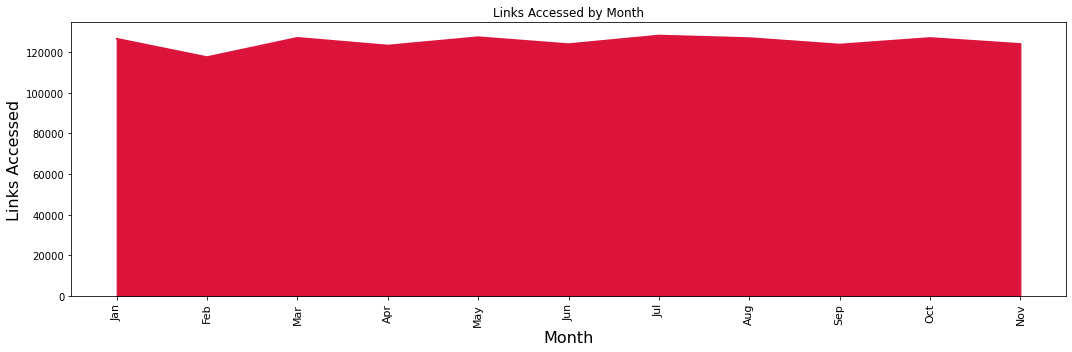

In [18]:
boxData = pd.DataFrame(columns = ['sum','month'])
boxData['month'] = web_data['datetime'].dt.strftime('%b')
df = pd.DataFrame()
df['sum'] = boxData.groupby('month')['month'].count()
import numpy as np
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']

df1 = df.reindex(new_order, axis=0)

fig, ax = plt.subplots()
df1.plot.area(ax=ax, y='sum', color='crimson',figsize=(15,5), legend=False)

ax.set_xticks(np.arange(len(df1.index)))
ax.set_xticklabels(df1.index)
plt.xticks(rotation=90,fontsize = 11)
plt.title("Links Accessed by Month")
ax.set_ylabel("Links Accessed",fontsize = 16)
ax.set_xlabel("Month",fontsize = 16)

ax.get_figure().tight_layout()
plt.show();

## Analysis
Once again there doesn't appear to be any patterns, although there was a slight dip in activity during February which is unlikely to be indicative of any security related issue. At a glance the web_data data set does not appear to have any particularly strange activity.

## The next step
The web_data data set has been sufficiently analysed and so another should be looked at. Another good data set to look for leads is email_data, as there are malicious ways in which it can be used. Lets now analyse the email_data data set to see whether there is any suspicious activity with regards to emails that have been sent.

To accomplish this, let's first start create a multiple line chart with the count of emails sent by week for each roll. This will show any if an unusually large number of emails was sent on any given week, with respect to how different users from different roles may send different numbers of emails.

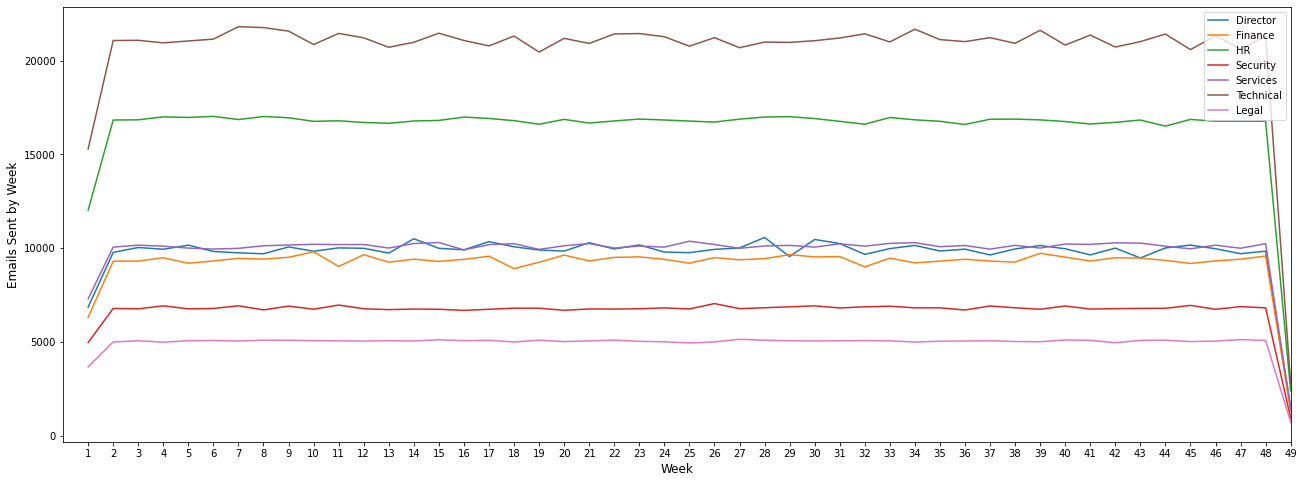

In [19]:
from importlib import reload
plt=reload(plt)

#It can be seen that the sender and recipient email address has the username at the start.
#First make a new dataframe with only the start of the email field, so that it contains the usernames
alteredData = pd.DataFrame()
alteredData['date'] = email_data['datetime'].dt.isocalendar().week
alteredData['sender'] = email_data['sender'].str[:7]
alteredData['recipient'] = email_data['recipient'].str[:7]

#Now the data set includes what week the email was sent, the sender username and the recipient username.
security = alteredData.loc[alteredData['sender'].isin(user_set['Security'])]
hr = alteredData.loc[alteredData['sender'].isin(user_set['HR'])]
technical = alteredData.loc[alteredData['sender'].isin(user_set['Technical'])]
services = alteredData.loc[alteredData['sender'].isin(user_set['Services'])]
legal = alteredData.loc[alteredData['sender'].isin(user_set['Legal'])]
finance = alteredData.loc[alteredData['sender'].isin(user_set['Finance'])]
director = alteredData.loc[alteredData['sender'].isin(user_set['Director'])]

#Create new empty plots for storing the subplot data
directorPlot = pd.DataFrame(columns=[director['date'].unique()])
financePlot = pd.DataFrame(columns=[finance['date'].unique()])
legalPlot = pd.DataFrame(columns=[legal['date'].unique()])
servicesPlot = pd.DataFrame(columns=[services['date'].unique()])
technicalPlot = pd.DataFrame(columns=[technical['date'].unique()])
hrPlot = pd.DataFrame(columns=[hr['date'].unique()])
securityPlot = pd.DataFrame(columns=[security['date'].unique()])

#Let's create a function for counting to reduce repeated code
def countValues(df,countDataset):
    newDF = df
    for week in range(0, newDF.shape[1]):
        newDF.iloc[:, week]  = (countDataset['date']==week+1).sum()
    return newDF

#Count the number of emails sent by week for each role, and store it in the previously created dataframes
directorPlot = directorPlot.append(pd.Series(name='Count',dtype='float64'))
directorPlot = countValues(directorPlot,director)

financePlot = financePlot.append(pd.Series(name='Count',dtype='float64'))
financePlot = countValues(financePlot,finance)

legalPlot = legalPlot.append(pd.Series(name='Count',dtype='float64'))
legalPlot = countValues(legalPlot,legal)

servicesPlot = servicesPlot.append(pd.Series(name='Count',dtype='float64'))
servicesPlot = countValues(servicesPlot,services)

technicalPlot = technicalPlot.append(pd.Series(name='Count',dtype='float64'))
technicalPlot = countValues(technicalPlot,technical)

hrPlot = hrPlot.append(pd.Series(name='Count',dtype='float64'))
hrPlot = countValues(hrPlot,hr)

securityPlot = securityPlot.append(pd.Series(name='Count',dtype='float64'))
securityPlot = countValues(securityPlot,security)

#Flip the y and x axis
directorPlot = directorPlot.T
financePlot = financePlot.T
hrPlot = hrPlot.T
securityPlot = securityPlot.T
technicalPlot = technicalPlot.T
legalPlot = legalPlot.T
servicesPlot = servicesPlot.T

#Let's increase the size to make it more readable
fig, ax = plt.subplots(figsize=(22,8))

#Set the y axis values
x=range(1,int(directorPlot.shape[0])+1)
y1 = directorPlot['Count']
y2 = financePlot['Count']
y3 = hrPlot['Count']
y4 = securityPlot['Count']
y5 = servicesPlot['Count']
y6 = technicalPlot['Count']
y7 = legalPlot['Count']

#Plot each of the subplots
ax = plt.plot(x,y1, label="Director")
ax = plt.plot(x,y2, label="Finance")
ax = plt.plot(x,y3, label="HR")
ax = plt.plot(x,y4, label="Security")
ax = plt.plot(x,y5, label="Services")
ax = plt.plot(x,y6, label="Technical")
ax = plt.plot(x,y7, label="Legal")

#Set appropriate labels
plt.xlabel("Week",fontsize=12)
plt.ylabel("Emails Sent",fontsize=12)
plt.ylabel("Emails Sent by Week")
plt.xticks(x)
plt.xlim([0,49])

#Display
plt.legend()
plt.show();

## Analysis
All graphs appear to follow the same pattern, and there are no significant events that are visible aside from a few bumps. Therefore it could be assumed for the time being that there is no suspicious activity with regards to email usage, however the possibility should still be considered that an outlier could be drowned out by the rest of the regular traffic due to each group having a sizeable number of users.

## The next step
Both the file_data and employee_data data sets are unlikely to be useful right now, as they are only contain contextual details which will not be useful for finding outliers. Therefore the next data set to analyse while grouping employees of different roles together is the usb_data data set. If no clear outliers can be seen from analysing this data set, an interactive method of visualisation will likely be necessary in order to visualise the large number of users' activity in an efficient manner.

The usb_data data set will now be analysed to check for any changes in activity over time. As USBs are often used for carrying out attacks, such as with rubber duckies, this should be a good way to analyse the data set.

As there has been little luck viewing the data grouped so far, each user will be plotted separately. Although this may make the visualisation more difficult to view, splitting each role in the form of a multi-line plot should make outliers visible despite there being 256 users.

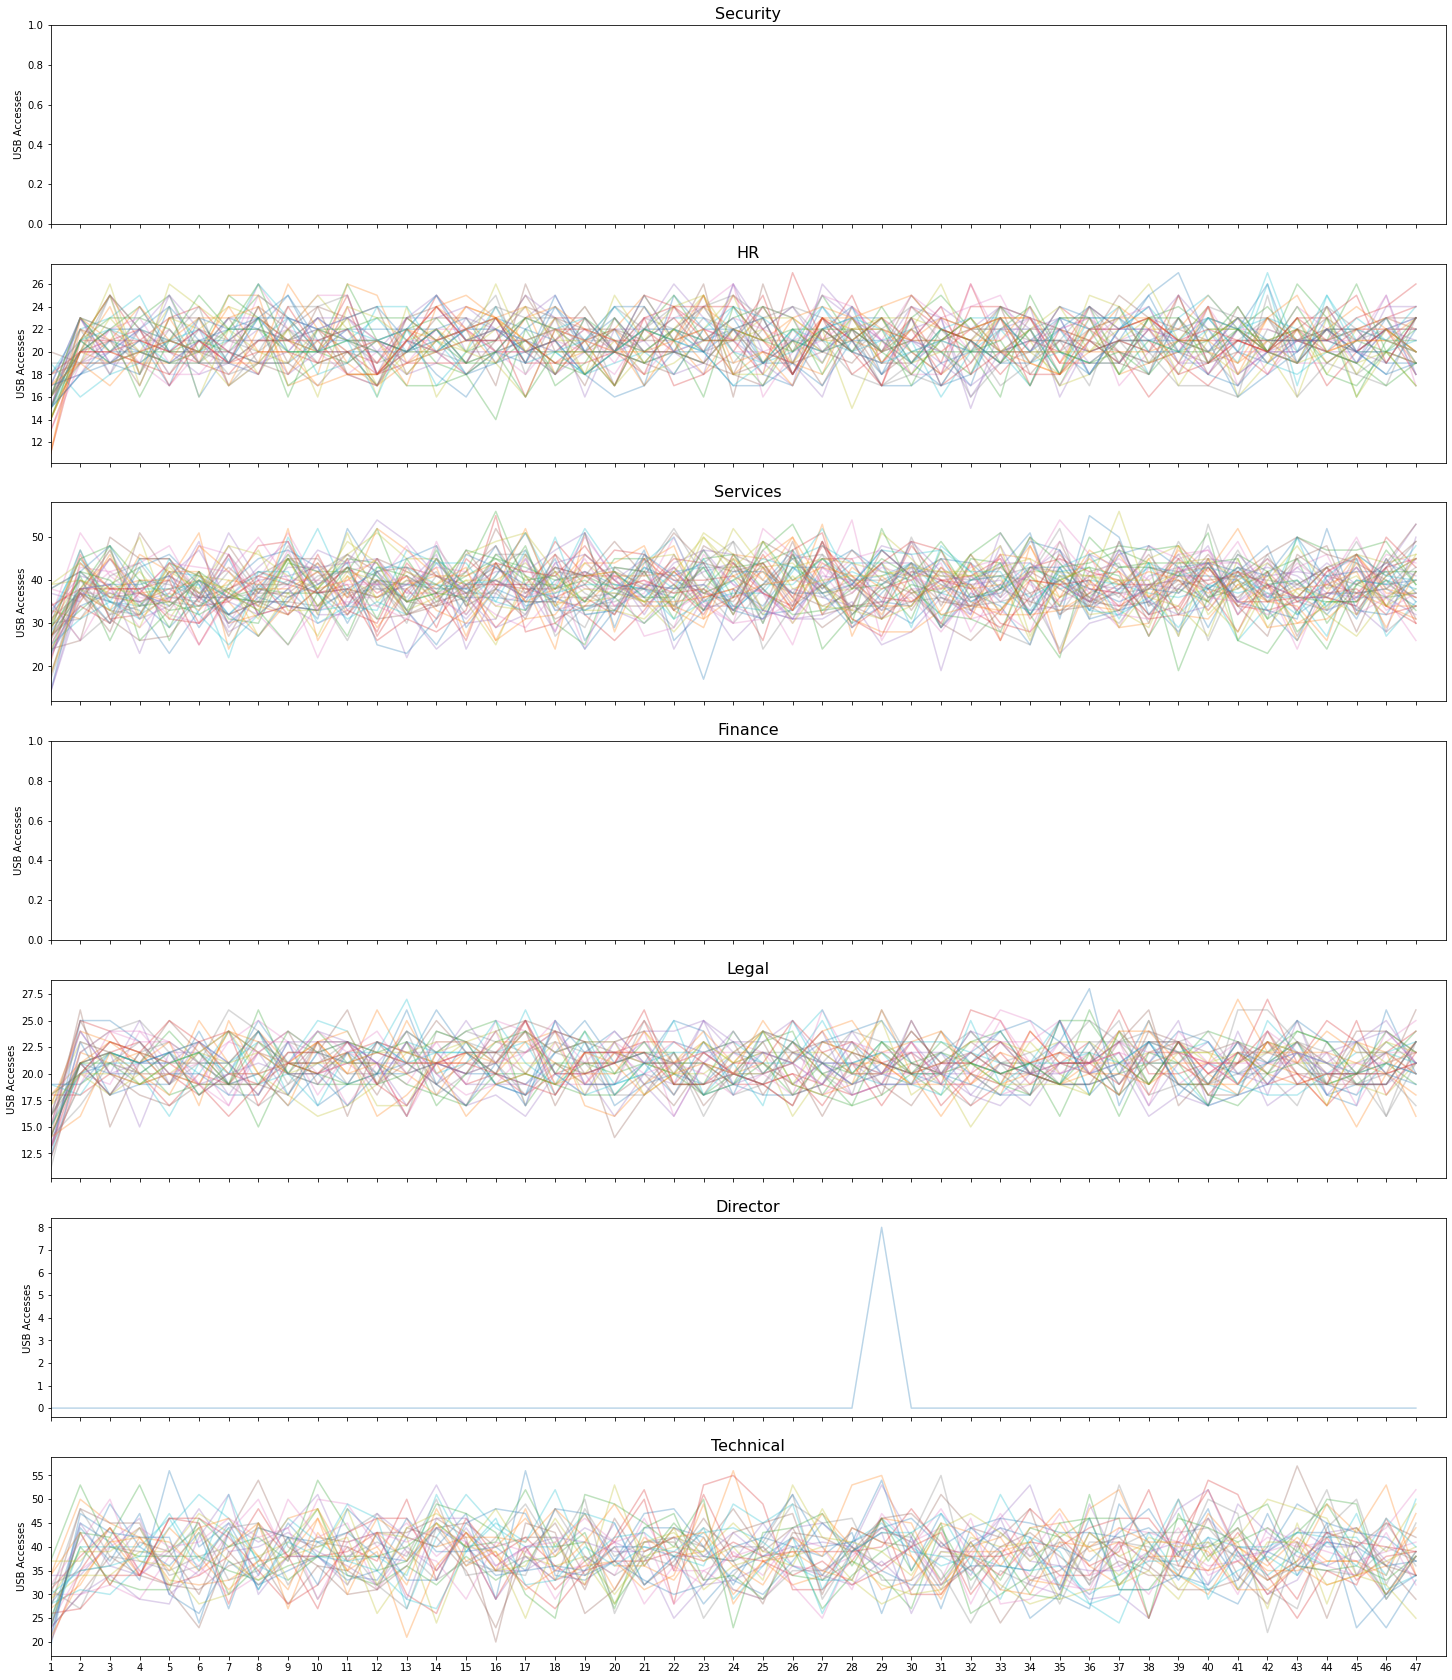

In [20]:
#There are 47 weeks of interest. Let's define some subplot spaces, and make the figure bigger
fig, ax = plt.subplots(7, 1, sharex=True,figsize=(25,30))
x=range(1,48)

#For each group, let's set a graph name and retrieve their data
for plot in range (0,7):
    if plot == 0:
        graph = 'Security'
    elif plot == 1:
        graph = 'HR'
    elif plot == 2:
        graph = 'Services'
    elif plot == 3:
        graph = 'Finance'
    elif plot == 4:
        graph = 'Legal'
    elif plot == 5:
        graph = 'Director'
    elif plot == 6:
        graph = 'Technical'
    groupData = usb_data[usb_data['user'].isin(user_set[graph]) ]
    #For each unique user in the current group to plot
    for user in groupData.user.unique():
        plotData = pd.DataFrame(columns=['user','week','count'])
        #For each week
        for week in range(1, 48):
            toSum = groupData.loc[(groupData.user==user) 
                                   & (groupData.datetime.dt.isocalendar().week == week)
                                  & (groupData.action == 'usb_insert')
                                  ]
            plotData = plotData.append({'user':user,'week':week,'count':toSum.shape[0]}, ignore_index=True)
        #Plot the subplot for the group
        ax[plot].plot(plotData['week'],plotData['count'], alpha=0.3)
        ax[plot].set_title(graph, fontsize=16)
        ax[plot].set_ylabel("USB Accesses")
        #The subtitles of empty plots must be set manually, as matplotlib won't draw them otherwise
        ax[0].set_title("Security", fontsize=16)
        ax[0].set_ylabel("USB Accesses")
        ax[3].set_title("Finance", fontsize=16)
        ax[3].set_ylabel("USB Accesses")
        plt.setp(ax[plot], xlim=[1,48])
        
#Set the xticks and display
#fig.ylabel("USB Accesses")
plt.xticks(x)
plt.show();

## Analysis
Firstly it can be seen that Security and Finance has not used USB at all, which is expected given their roles are much less likely to use USB as others such as Technical.
A detail that does stand out as suspicious however, is the point anomaly in USB usage seen from a director.

As these actions appear to be from a director, it could be suspected that this action was normal given that they are likely more trustworthy and may not follow such strict roles within the company as others. For example, someone who works in Security are much more likely to follow a strict schedule. It is also a possibility that someone else used the director's computer for something malicious which should be investigated further.

Already this appears suspicious, and it only becomes more so when it is considered that out of all 22 directors, this was the only time across the whole year in which one used a USB stick.

## The next step
Let's now investigate this anomaly further. The supposed director's user ID is usr-zth, and so using this information his USB usage will be looked into further using some queries.

Firstly let's see what computer he transferred this USB data to.

In [21]:
directorData = usb_data[usb_data['user']=='usr-zth']
directorData['pc'].unique()

array(['pc248'], dtype=object)

This director has only transferred data to PC 248 via USB, meaning that this was the PC they accessed from the point anomaly previously noticed.

Let's also see what time this occurred for reference.

In [22]:
directorData['datetime']

268248   2020-07-14 04:51:05.843710
268249   2020-07-14 04:55:29.724118
268258   2020-07-14 05:16:00.104650
268277   2020-07-14 05:49:58.767902
268477   2020-07-14 08:58:44.914490
268587   2020-07-14 09:56:12.733862
269180   2020-07-14 14:47:39.908170
269235   2020-07-14 15:15:30.364386
269364   2020-07-14 16:21:40.750298
269395   2020-07-14 16:48:57.523164
269488   2020-07-14 18:21:20.872672
269530   2020-07-14 19:04:12.606599
272506   2020-07-17 07:13:52.596601
272520   2020-07-17 07:24:08.670817
273645   2020-07-17 17:02:54.922406
273650   2020-07-17 17:07:05.277382
Name: datetime, dtype: datetime64[ns]

Therefore the activity of interest happened in July the 14th at early hours, and the 17th mid day. The fact that the USB transfer took place on the 14th at early hours is also concerning, as it might be a way this user tried to avoid detection.

Looking at the most interesting date (July 14th between 1am and 6am) let's see what files were transferred.

In [23]:
start_date = '07-14-2020 01:00'
end_date = '07-17-2020 06:00'

anomaly = file_data[(file_data['datetime'] > start_date) & (file_data['datetime'] <= end_date) & (file_data['user'] == 'usr-zth')]

anomaly.filename.unique()

array(['/private', '/docs/employment', '/FYEO', '/do_not_delete',
       '/company_profile', '/system/general', '/tech', '/docs/social',
       '/policy', '/secret', '/newsletter', '/docs/committee', '/docs',
       '/newsletter/general', '/misc', '/docs/general',
       '/private/staffreview'], dtype=object)

There is immediately a directory that stands out, named 'secret' - However given that this is supposedly a director, it's very likely that they might have confidential files on their computer. On top of this, other less suspicious files are being transferred and so this may not necessarily be bad.

Checking whether there are any other users that have this directory, it can also be seen that all users have one and so this is likely not of any sort of concern.

Now let's look into what other activity happened during this time, and see if he accessed any web links.

In [24]:
web_activity = web_data[((web_data['user'] == 'usr-zth')
                   & (web_data['datetime'] > '2020-07-14 01:00:00')
                   & (web_data['datetime'] < '2020-07-14 06:00'))]
web_activity['website'].value_counts()

http://www.google.com         1
http://www.theatlantic.com    1
Name: website, dtype: int64

This user did access the web, however it appears to be innocent websites that are of no concern.

What about emails?

In [25]:
email_activity = email_data[((email_data['sender'].str[:7] == 'usr-zth')
                   & (email_data['datetime'] > '2020-07-14 01:00:00')
                   & (email_data['datetime'] < '2020-07-14 06:00'))]
print(str(email_activity.shape[0])+" emails were sent during this time period.")
email_activity[['recipient', 'datetime']]

11 emails were sent during this time period.


,recipient,datetime
2210006,usr-svz@lockdown-lockups.com,2020-07-14 01:08:27.104060
2210018,usr-kvv@lockdown-lockups.com,2020-07-14 01:30:07.747411
2210020,usr-szb@lockdown-lockups.com,2020-07-14 01:32:47.091350
2210028,usr-mwj@lockdown-lockups.com,2020-07-14 01:48:28.352371
2210081,usr-hui@lockdown-lockups.com,2020-07-14 03:19:34.966032
2210084,usr-qjv@lockdown-lockups.com,2020-07-14 03:23:02.039563
2210122,usr-ime@lockdown-lockups.com,2020-07-14 04:05:42.246471
2210127,usr-qtg@lockdown-lockups.com,2020-07-14 04:08:07.088374
2210142,usr-nvl@lockdown-lockups.com,2020-07-14 04:18:26.158326
2210358,usr-sjc@lockdown-lockups.com,2020-07-14 05:35:25.060356


This is perhaps strange, as the Director has clearly come in very early morning, transferred files via a USB stick which they have not done before (and neither has any other director), and they have also sent 11 emails.

It is notable that as a Director, they are perhaps under a large amount of pressure with tight deadlines and have had to come in early to do some extra work. To see whether this is the case, let's see if they have been logging in earlier much prior to this event - and if so, to what computers.

First let's see what computer this user has used in the past.

In [26]:
login_activity = login_data[(login_data['action'] == 'login') & (login_data['user'] == 'usr-zth')]
login_activity['pc'].value_counts()

pc170    335
Name: pc, dtype: int64

This is immediately a clear red flag, as the user has supposedly never logged into PC 248 - however he is a known employee to have transferred files from it. This would indicate he is either using someone else's login, or he found a way to bypass the login screen altogether.

### Analysis and Red Flag
This means that the director with the username 'usr-zth' accessed a computer that he had not logged into and transferred files via USB. On top of this, this was done at early hours in the morning on a computer that this user has never logged onto in the past, as they have only ever previously used PC 170.

To find more details about what happened, let's check who previously logged into this computer.

In [27]:
login_activity = login_data[(login_data['pc'] == 'pc248')&
                            (login_data['datetime'] > '2020-07-13 00:00:00')&
                            (login_data['datetime'] < '2020-07-14 08:00')]
login_activity.sort_values(by='datetime',inplace=True,ascending=False)
login_activity

<ipython-input-27-5cfbb590b1f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  login_activity.sort_values(by='datetime',inplace=True,ascending=False)


,datetime,user,action,pc
96938,2020-07-13 16:38:50,usr-eie,logoff,pc248
96775,2020-07-13 08:42:32,usr-eie,login,pc248


And finally there is proof that this user had malicious intent. It can be seen that not only did the director supposedly not log in, but the computer he transferred files to was already logged off suggesting that he either bypassed the login screen altogether, or he made an effort to remove the entry from the 'login_data' data set - both possible scenarios suggesting that the user usr-zth is indeed an insider threat.

If it was shown that user usr-eie had forgotten to log off, then the director's activities could have perhaps been excused as very poor practice. They might have been behind schedule for example, and being a director the user might have chosen to come in early and needed to send 11 emails to different users containing files from the USB stick. And when they came in, they might have chose to use a computer that was left on out of laziness. This is already a huge stretch however, and this last piece of evidence rules this option out as it was clear that the director either tried to hide their tracks (deleted the login entry after they were done) or they purposefully found a way to bypass the login altogether.

Now with the insider threat identified, there are opportunities for other exploration methods now that the analysis can be focused on one user. Let's first see how this user's web activity has changed month by month. This will be done with an interactive visualisation to cycle through the links the user has accessed by month.

Using a scatterplot for this purpose, the intensity (opacity) indicates how many times the user has looked at the same website day by day in order to see whether there are any particular sites they often visit.

In [28]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random

work_web_data = web_data.copy()

def series(Month):
    plt.subplots(figsize=(12,6))
    data = work_web_data.loc[(work_web_data['user']=='usr-zth')&(work_web_data['datetime'].dt.month == Month)]
    plt.scatter(data['datetime'].dt.day,data['website'],alpha=0.3)
    plt.xlabel("Day of Month",fontsize=12)
    plt.ylabel("Links accessed",fontsize=12)
    plt.title("Web links accessed by usr-zth")

interact(series, Month=(1,12,1));

interactive(children=(IntSlider(value=6, description='Month', max=12, min=1), Output()), _dom_classes=('widget…

There doesn't appear any web links accessed that seem to be suspicious, or any particularly strange web activity in general.

Finally, let's check their email usage again in more detail. This will be done by creating a stacked bar chart to view how many emails they have sent and received by month.

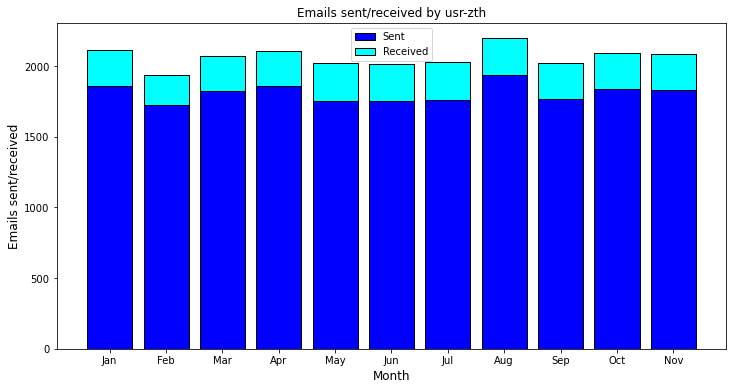

In [29]:
work_email_data = email_data.copy()
month = []

#Create a plot of an appropriate size
fig, ax = plt.subplots(figsize=(12,6))

#Create a new dataframe for each part of the stacked bar
y1 = pd.DataFrame(columns=['month','sum'])
y2 = pd.DataFrame(columns=['month','sum'])

#For every month
for x in range (1,12):
    #Get some of emails sent by the suspected insider by month
    c = ((work_email_data.datetime.dt.month == x)
    &(work_email_data.sender=='usr-zth@lockdown-lockups.com')).sum()
    y1 = y1.append({'month': x, 'sum': c}, ignore_index=True)
    #Get some of emails received by the suspected insider by month
    c = ((work_email_data.datetime.dt.month == x)
    &(work_email_data.recipient=='usr-zth@lockdown-lockups.com')).sum()
    y2 = y2.append({'month': x, 'sum': c}, ignore_index=True)
    
#Plot the dataframes
ax = plt.bar(y1['month'], y1['sum'], color='b',edgecolor='black',label='Sent')
ax = plt.bar(y2['month'], y2['sum'], bottom=y1['sum'], color='aqua',edgecolor='black',label='Received')

#Give the visualisation clear labels
plt.xlabel("Month",fontsize=12)
plt.ylabel("Emails sent/received",fontsize=12)
plt.title("Emails sent/received by usr-zth")
#Convert the xticks from month number to name (e.g. '2' to Feb)
plt.xticks(ticks = range(1,len(y1['sum'])+1), labels = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov'])
plt.legend()
plt.show();

Similarly there are no patterns of any particular interest, however it is very clear that this user sends an incredibly large number of emails each day and so it was perhaps not too strange that they sent 11 emails within the short duration of the suspicious activity, though it is still certainly worthy of note.

It is decided at this point that not only has the insider threat been detected, but also all data sets have been thoroughly analysed for any additional potentially important information regarding the suspicious activities. Now that the analysis is complete, the findings will be collated into a story.



## The Verdict

#### Story
At an unknown early hour in the morning (estimated 12pm to 1am), 14th of July 2020, the Director with the username 'usr-zth' came into work unusually early.
This user has only ever used the computer with the ID 'pc170', however this time they proceeded to go use the computer 'pc248' instead. From here, the suspected insider took one of two actions:
- They logged in, before later going out of their way to delete the 'login' and 'logoff' entry with their Director priveledges
- They found a way to bypass the login system entirely, and actively went out of their way to avoid it

Now logged into an alternate PC to what the user usually uses, presumably while alone for cover (which would explain why they chose to come in early hours), they proceeded to transfer files to/from a USB stick from the first file being transferred at 01:06, and the last file being transferred at 05:42. The directories for these files include:
- /private
- /docs/employment
- /FYEO
- /do_not_delete
- /company_profile
- /system/general
- /tech
- /docs/social
- /policy
- /secret
- /newsletter
- /docs/committee
- /docs
- /newsletter/general
- /misc
- /docs/general
- /private/staffreview

During this time period, they also sent 11 emails to different users including:
- usr-svz@lockdown-lockups.com
- usr-kvv@lockdown-lockups.com
- usr-szb@lockdown-lockups.com
- usr-mwj@lockdown-lockups.com
- usr-hui@lockdown-lockups.com
- usr-qjv@lockdown-lockups.com
- usr-ime@lockdown-lockups.com
- usr-qtg@lockdown-lockups.com
- usr-nvl@lockdown-lockups.com
- usr-sjc@lockdown-lockups.com
- usr-kdj@lockdown-lockups.com

#### Summary
- The director with the username usr-zth came into work at early hours (12pm-1am)
- They chose to use the computer 'pc248', instead of 'pc170' which they usually use
- They then either bypassed the login screen, or loggined in normally but were able to delete the log from the records after they were finished
- They next transferred files via a USB - something this user nor any other director has done before
- While they did this, they also sent 11 emails to different users.

#### Recommendation for Moving Forwards
It is recommended that the Director with the username 'usr-zth' is immediately suspended while a more detailed investigation is conducted. The 11 emails previously sent should all be checked for their potentially dangerous content (e.g. malware), as well as the listed directories that files were transferred between via USB.

Although it is unknown what the user may have been after with this activity, it is clear they went far out of their way to make sure their actions were not known and so further investigation should be conducted.